In [32]:
from scipy import ndimage, misc
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import random
# Берем метод DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [33]:
# Возьмем уже знакомую картинку.
image = Image.open('d.jpg')
pix3 = image.load()

In [36]:
%%time
# Создаем объект для кластеризации.
#db=DBSCAN(eps=16, min_samples=3, n_jobs=4)
db=KMeans(n_clusters=6)

data = [(x, y, pix3[x, y][0], pix3[x, y][1], pix3[x, y][2]) for x in range(image.size[0]) for y in range(image.size[1])]

db_clusters=db.fit_predict(data)

CPU times: total: 828 ms
Wall time: 234 ms


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


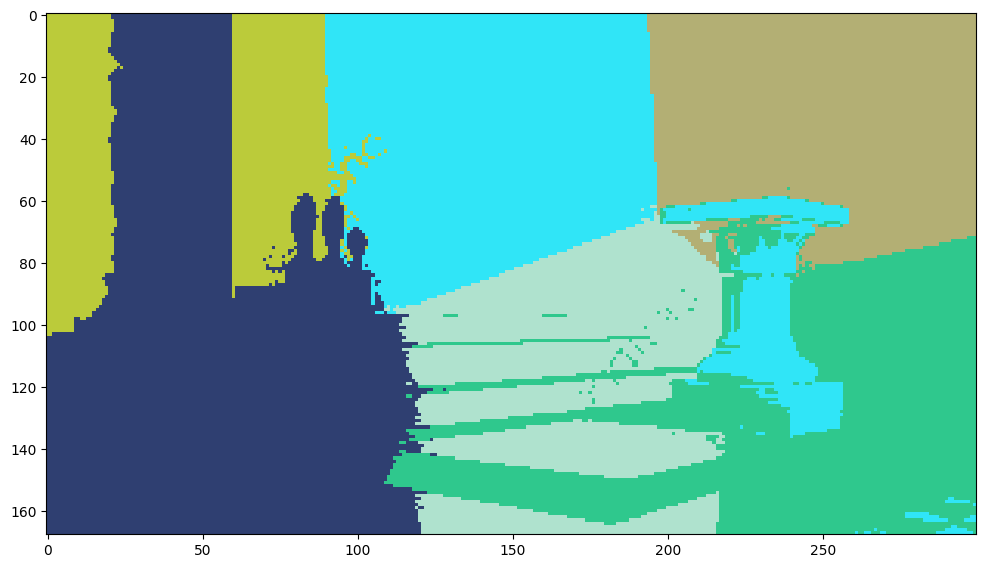

In [37]:
colors = [(int(255*random.random()), int(255*random.random()), int(255*random.random())) 
          for i in range(max(db_clusters)+1)]
for p, c in zip(data, db_clusters):
    pix3[p[0], p[1]] = colors[c]
    # pix3[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                        # int(db.cluster_centers_[c, 3]), 
                        # int(db.cluster_centers_[c, 4]))
    
plt.rcParams['figure.figsize'] = (12, 8)    
ax = plt.subplot()
ax.imshow(image);